In [1]:
from tensorflow.keras.models import load_model

model = load_model('VGG16_DocClassifier.model')

2022-04-22 23:32:07.642060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 23:32:07.642195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-22 23:32:32.071217: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-22 23:32:32.071268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yasmine-Lenovo-ideapad-130-15IKB): /proc/driver/nvidia/version does not exist
2022-04-22 23:32:32.109191: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical

In [10]:
import os
import cv2
import tensorflow as tf
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

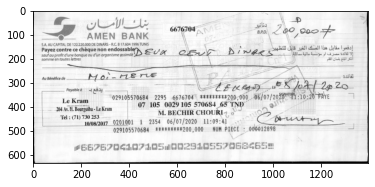

In [6]:
images = convert_from_path("/home/yasmine/Téléchargements/2 29/20200716-00100002.pdf")
image=images[0].save('img1.jpg', 'JPEG')
image = cv2.imread('img1.jpg')
plt.imshow(image)

In [15]:
path="/home/yasmine/Téléchargements/2 29/"
i=0
data=[]
name=[]
for filename in os.listdir(path):
    #print(filename)
    images = convert_from_path(path+filename)
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (224,224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    i=i+1
    name.append(filename)
    data.append(image)

In [16]:
data= np.array(data)
print(data.shape)

(154, 224, 224, 3)


In [17]:
predicted_labels = model.predict(data)

In [13]:
#print(predicted_labels)
pdfWriter = PdfFileWriter()


In [24]:
print(name)

['20200716-00100042.pdf', '20200716-00100088.pdf', '20200716-00100077.pdf', '20200716-00100031.pdf', '20200716-00100043.pdf', '20200716-00100146.pdf', '20200716-00100126.pdf', '20200716-00100142.pdf', '20200716-00100093.pdf', '20200716-00100110.pdf', '20200716-00100008.pdf', '20200716-00100065.pdf', '20200716-00100134.pdf', '20200716-00100143.pdf', '20200716-00100085.pdf', '20200716-00100078.pdf', '20200716-00100094.pdf', '20200716-00100119.pdf', '20200716-00100024.pdf', '20200716-00100100.pdf', '20200716-00100050.pdf', '20200716-00100092.pdf', '20200716-00100122.pdf', '20200716-00100090.pdf', '20200716-00100062.pdf', '20200716-00100112.pdf', '20200716-00100082.pdf', '20200716-00100070.pdf', '20200716-00100055.pdf', '20200716-00100028.pdf', '20200716-00100148.pdf', '20200716-00100149.pdf', '20200716-00100089.pdf', '20200716-00100060.pdf', '20200716-00100071.pdf', '20200716-00100010.pdf', '20200716-00100095.pdf', '20200716-00100115.pdf', '20200716-00100086.pdf', '20200716-00100037.pdf',

In [29]:
print(9.41516638e-01 )

0.941516638


In [28]:
print(predicted_labels)

[[3.51169234e-04 9.41516638e-01 2.85172299e-03 5.52804358e-02]
 [2.36847345e-02 4.67775064e-03 9.67198014e-01 4.43944894e-03]
 [2.71405261e-02 2.64490433e-02 7.84479558e-01 1.61930829e-01]
 [1.57618150e-01 6.43760383e-01 3.20038293e-03 1.95421085e-01]
 [1.31229023e-02 7.53504395e-01 4.38762009e-02 1.89496398e-01]
 [6.13415011e-07 2.57368828e-03 9.94979084e-01 2.44654086e-03]
 [2.53376318e-03 2.09884383e-02 1.46038175e-01 8.30439627e-01]
 [2.89971535e-06 1.39460375e-03 9.94586706e-01 4.01577726e-03]
 [4.43603552e-04 1.11948118e-01 8.86162460e-01 1.44581764e-03]
 [4.99357469e-04 2.81786866e-04 2.68644653e-03 9.96532440e-01]
 [9.96822596e-01 6.99348515e-04 1.68873707e-03 7.89379119e-04]
 [2.94850231e-03 1.74734723e-02 9.78576362e-01 1.00171671e-03]
 [6.45566502e-07 2.50395708e-04 9.98129666e-01 1.61924912e-03]
 [1.89856075e-06 1.37400199e-02 9.78719652e-01 7.53844343e-03]
 [3.61688755e-04 1.88388191e-02 9.80688095e-01 1.11384761e-04]
 [2.29123354e-01 3.99212427e-02 5.55389345e-01 1.755660

In [31]:
for i in range(len(predicted_labels)) :
    if max(predicted_labels[i])>=0.7:
        if max(predicted_labels[i])==predicted_labels[i][0]:
            if not os.path.exists("/home/yasmine/Téléchargements/doc/01/"):
                os.makedirs("/home/yasmine/Téléchargements/doc/01/")
                #print("document de classe 0")
                images = convert_from_path(path+name[i])
                #print(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/01/"+name[i].replace("pdf", "jpg", 1),image)
            else:
                images = convert_from_path(path+name[i])
                #print(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/01/"+name[i].replace("pdf", "jpg", 1),image)
                
            
            
        elif max(predicted_labels[i])==predicted_labels[i][1]:
            if not os.path.exists("/home/yasmine/Téléchargements/doc/02/"):
                os.makedirs("/home/yasmine/Téléchargements/doc/02/")
                #print("document de classe 1")
                images = convert_from_path(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/02/"+name[i].replace("pdf", "jpg", 1),image)
            else:
                images = convert_from_path(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/02/"+name[i].replace("pdf", "jpg", 1),image)
                
        elif max(predicted_labels[i])==predicted_labels[i][2]:
            if not os.path.exists("/home/yasmine/Téléchargements/doc/03/"):
                os.makedirs("/home/yasmine/Téléchargements/doc/03/")
                #print("document de classe 2")
                images = convert_from_path(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/03/"+name[i].replace("pdf", "jpg", 1),image)
            else:
                images = convert_from_path(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/03/"+name[i].replace("pdf", "jpg", 1),image)
                
        else:
            if not os.path.exists("/home/yasmine/Téléchargements/doc/11/"):
                os.makedirs("/home/yasmine/Téléchargements/doc/11/")
                #print("document de classe 3")
                images = convert_from_path(path+name[i])
                #print(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/11/"+name[i].replace("pdf", "jpg", 1),image)
            else:
                images = convert_from_path(path+name[i])
                #print(path+name[i])
                images[0].save('img.jpg', 'JPEG')
                image = cv2.imread('img.jpg')
                cv2.imwrite("/home/yasmine/Téléchargements/doc/11/"+name[i].replace("pdf", "jpg", 1),image)
    else:
        
        #print("classe non connue")
        images = convert_from_path(path+name[i])
        #print(path+name[i])
        images[0].save('img.jpg', 'JPEG')
        image = cv2.imread('img.jpg')
        #plt.show(image)
        cv2.imwrite("/home/yasmine/Téléchargements/doc/"+name[i].replace("pdf", "jpg", 1),image)
    

/home/yasmine/Téléchargements/2 29/20200716-00100126.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100110.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100008.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100119.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100122.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100002.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100108.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100105.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100103.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100009.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100111.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100101.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100005.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100154.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100102.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100004.pdf
/home/yasmine/Téléchargements/2 29/20200716-00100107.pdf
/home/yasmine/Téléchargements/2